# Solution to Lab 1: Abdolkarim Ghaderi

In this lab, we have 5 questions, and each question is worth 0.5 points, for a total of 2.5 points. For each question, you must not only implement the code but also explain your observations

# 📊 Data, EDA, and Preprocessing

---

## 🔹 What is Data?
- **Data** is raw information, such as numbers, text, or images, that we collect for analysis.  
- When processed and organized, data becomes meaningful and can be used to make decisions or train machine learning models.  

---

## 🔹 Structured vs Unstructured Data
- **Structured data** → Data that is neatly organized, like in tables or Excel sheets.  
  *Examples: names, phone numbers, dates.*  
- **Unstructured data** → Data that is not organized in a clear way.  
  *Examples: pictures, videos, emails, text messages.*  

---

## 🔹 Types of Data

| **Type**                   | **Subtype**   | **Meaning**                                     | **Examples** |
|-----------------------------|---------------|-------------------------------------------------|--------------|
| **Numerical (Quantitative)** | **Discrete**  | Whole numbers you can count (no decimals).      | Number of students = 30, Number of cars = 12 |
|                             | **Continuous** | Numbers you can measure (can include decimals). | Height = 175.5 cm, Weight = 68.2 kg, Temperature = 36.7°C |
| **Categorical (Qualitative)** | **Binary**   | Only 2 possible values.                         | Yes/No, Male/Female, On/Off |
|                             | **Ordinal**   | Categories with a natural order/rank.           | Education = High school < Bachelor < Master < PhD |
|                             | **Nominal**   | Categories with no order, just labels.          | Colors = Red, Blue, Green; Countries = Sweden, Iran, Italy |

---

## 🔹 1. Exploratory Data Analysis (EDA)

**What you usually do in EDA:**
- Check the shape of the dataset (rows, columns).  
- Look at missing values.  
- See the basic statistics (mean, median, min, max).  
- Make plots (histograms, boxplots, scatterplots) to understand distributions and relationships.  
- Detect outliers or unusual data points.  

📊 **Example**: If you have a dataset of students’ scores, EDA helps you see:  
- Average score  
- Who scored the highest and lowest  
- Whether boys and girls performed differently  
- If there are missing exam results  

---

## 🔹 2. Preprocessing

 Preprocessing means **cleaning and preparing raw data** so it can be used for analysis or training models.  

**Common Steps in Preprocessing:**
- **Cleaning data**   
  - Handle missing values (fill them, drop them).  
  - Remove duplicates.  
  - Correct wrong or inconsistent values.  

- **Transforming data**
  - Convert text into numbers (e.g., Male = 0, Female = 1).  
  - Normalize/scale numerical values (e.g., make all features between 0 and 1).  

- **Reducing data**  
  - Drop irrelevant columns.  
  - Use feature selection or dimensionality reduction (like PCA).  

- **Splitting data**   
  - Divide into training set and test set.  

 **Example**: If you have house price data:  
- Remove rows where the price is missing.  
- Convert “Yes/No” for garage into 1/0.  
- Scale square meters so they’re comparable to number of rooms.  
- Split into training (80%) and test (20%).  

 In short: Preprocessing = making raw data **clean, consistent, and ready to use**.  



## **🔸 Imports**

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import  missingno as msno

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler

## **🔸 Hello Data**

### Load dataset

In [45]:
import pandas as pd

url = "https://raw.githubusercontent.com/Azadshokrollahi/Artificial-intelligence-for-data-science-/main/insurance.csv"
df = pd.read_csv(url)
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,NaN,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [46]:
df.shape

(1338, 7)

In [47]:
df.dtypes

age         float64
sex          object
bmi         float64
children    float64
smoker       object
region       object
charges     float64
dtype: object

### Access to rows and columns

In [48]:
df.iloc[0:3, 2:4]
df.iloc[[0, 1337]]
df.iloc[:, [0]]

,age
0,19.0
1,NaN
2,28.0
3,33.0
4,32.0
...,...
1333,50.0
1334,18.0
1335,NaN
1336,21.0


In [49]:
df[['children', 'sex']]
df.children

0       0.0
1       1.0
2       3.0
3       0.0
4       0.0
       ... 
1333    3.0
1334    0.0
1335    0.0
1336    0.0
1337    0.0
Name: children, Length: 1338, dtype: float64

### Make a codable dataset

In [50]:
df.columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
df

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,NaN,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,no,northwest,10600.54830
1334,18.0,female,31.920,0.0,no,northeast,2205.98080
1335,NaN,female,36.850,0.0,no,southeast,1629.83350
1336,21.0,female,25.800,0.0,no,southwest,2007.94500


# **Question 1: Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) is the process of exploring a dataset to understand its structure, main characteristics, and patterns before applying any machine learning model.  
The goal is to **summarize the data, find relationships, and detect trends or anomalies**.  

In EDA, we often use:  
- **Statistical summaries** → `df.describe()`  
- **Correlation analysis** → `df.corr()`
- **Visualizations** such as:  
  - Histograms → show distributions of individual features  
  - Subplots → compare multiple features at once  
  - Pair plots → show relationships between features  

---

### **Student Task**

1. Perform EDA on the dataset using:  
   - `df.describe()`  
   - `df.corr()`
   - Different diagrams such as **histogram, subplot, and pair plot**  

2. In a **text cell**, write down your **observations**:  
   - What do you notice about the distribution of values?  
   - Which features are correlated (positively or negatively)?  
   - Did you find any unusual patterns or outliers?  


### Describing the numeric and non-numeric data

In [51]:
# Describing only the numeric cols (by default, describe() in pandas summarizes numeric cols only)
num_cols = df.select_dtypes(include='number').columns.tolist()
df[num_cols].describe()

,age,bmi,children,charges
count,1318.000000,1284.000000,1205.000000,1338.000000
mean,39.528832,30.629611,1.075519,13270.422265
std,13.909197,6.061066,1.204273,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.220000,0.000000,4740.287150
50%,40.000000,30.300000,1.000000,9382.033000
75%,51.000000,34.520000,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [52]:
# Describing the non-numeric cols
non_num_cols = df.select_dtypes(exclude='number').columns
df[non_num_cols].describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


### Correlation Coefficients for numeric cols

In [53]:
# Finding correlation coeff. (by default, corr() in pandas only works on numeric cols)
# Adding "numeric_only" to avoid getting warning, though!
df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.127679,0.053548,0.298536
bmi,0.127679,1.000000,0.021078,0.172537
children,0.053548,0.021078,1.000000,0.071236
charges,0.298536,0.172537,0.071236,1.000000


### Visualization: Individual plots

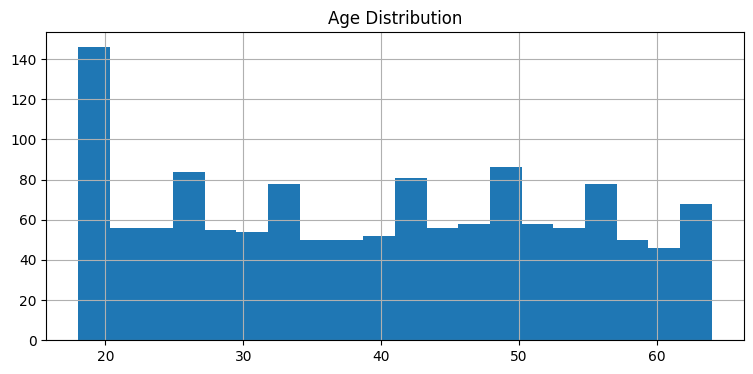

In [54]:
# Individual distribution plot: age
df['age'].hist(figsize=(9, 4), bins=20)
plt.title("Age Distribution")
plt.show()

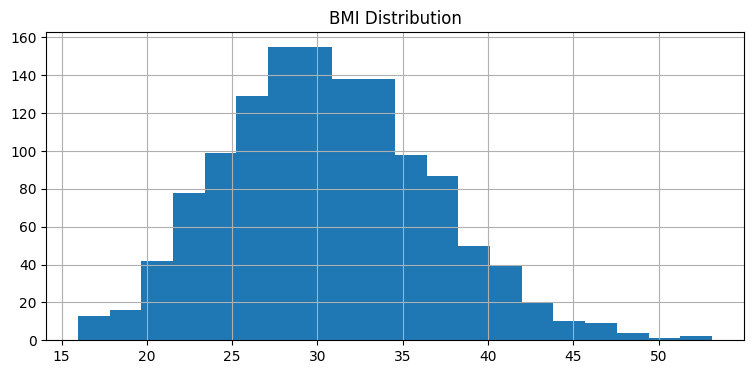

In [55]:
# Individual distribution plot: bmi
df['bmi'].hist(figsize=(9, 4), bins=20)
plt.title("BMI Distribution")
plt.show()

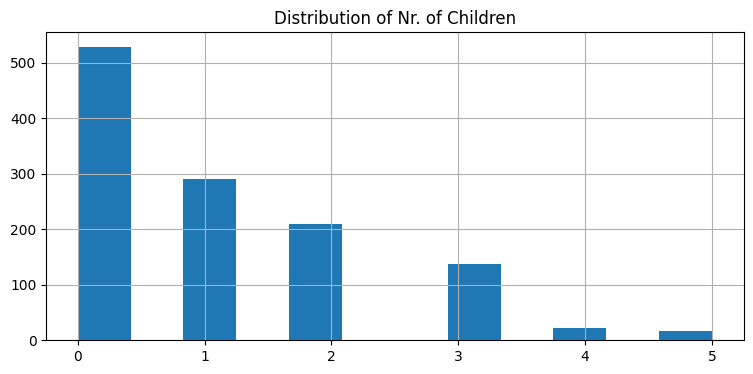

In [56]:
# Individual distribution plot: bmi
df['children'].hist(figsize=(9, 4), bins=12)
plt.title("Distribution of Nr. of Children")
plt.show()

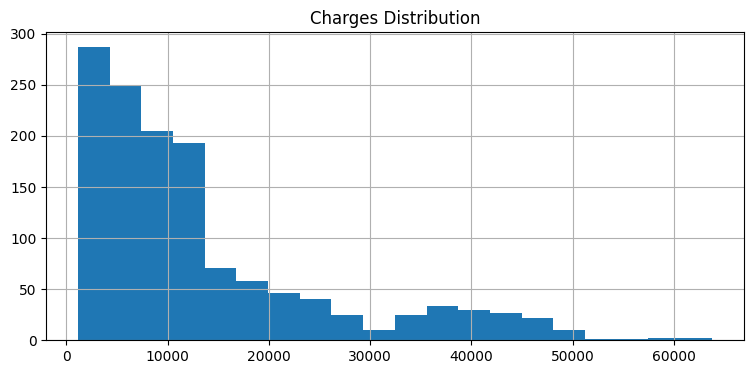

In [57]:
# Individual distribution plot: charges
df['charges'].hist(figsize=(9, 4), bins=20)
plt.title("Charges Distribution")
plt.show()

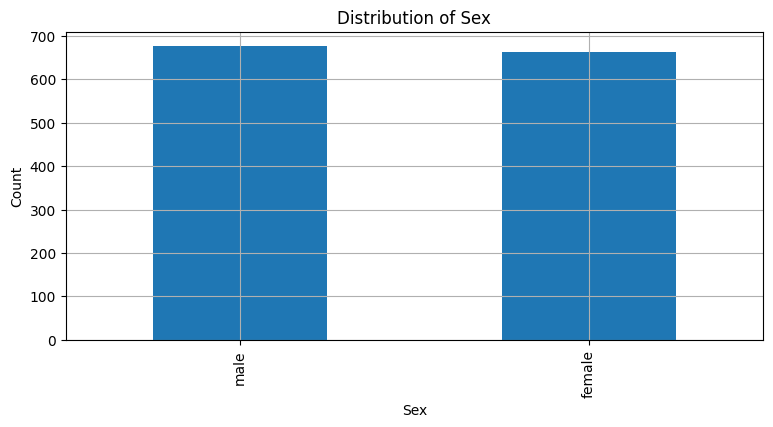

In [58]:
# Individual distribution plot: sex (non-numeric col)
plt.figure(figsize=(9, 4))
df['sex'].value_counts().plot(kind='bar')
plt.title("Distribution of Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.grid(True)
plt.show()

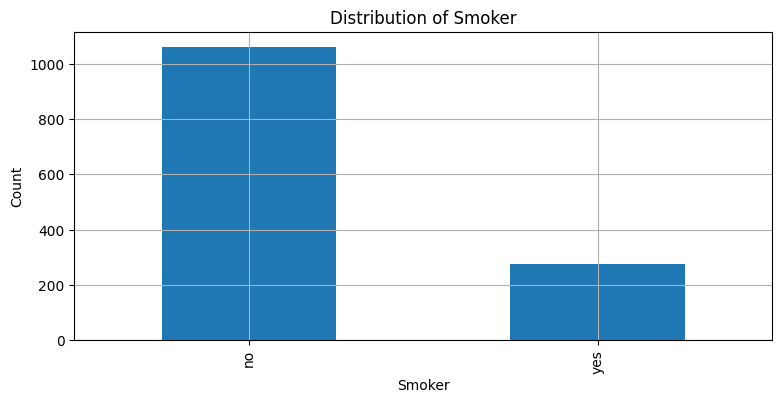

In [59]:
# Individual distribution plot: Smoker (non-numeric)
plt.figure(figsize=(9, 4))
df['smoker'].value_counts().plot(kind='bar')
plt.title("Distribution of Smoker")
plt.xlabel("Smoker")
plt.ylabel("Count")
plt.grid(True)
plt.show()

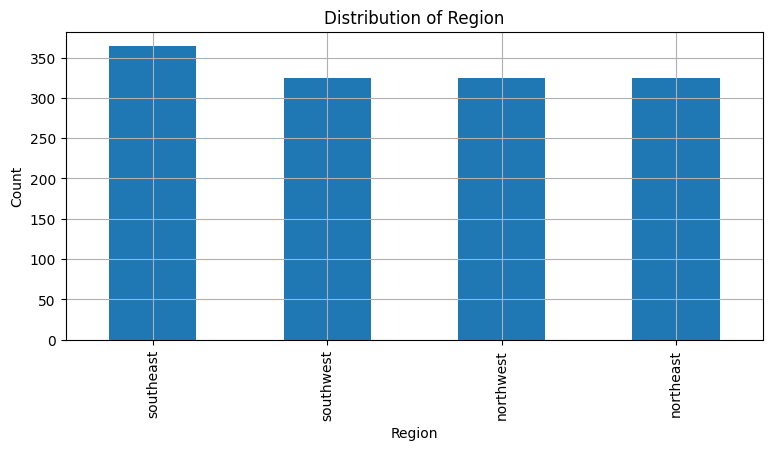

In [60]:
# Individual distribution plot: region (non-numeric)
plt.figure(figsize=(9, 4))
df['region'].value_counts().plot(kind='bar')
plt.title("Distribution of Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.grid(True)
plt.show()

### Visualization: Subplots

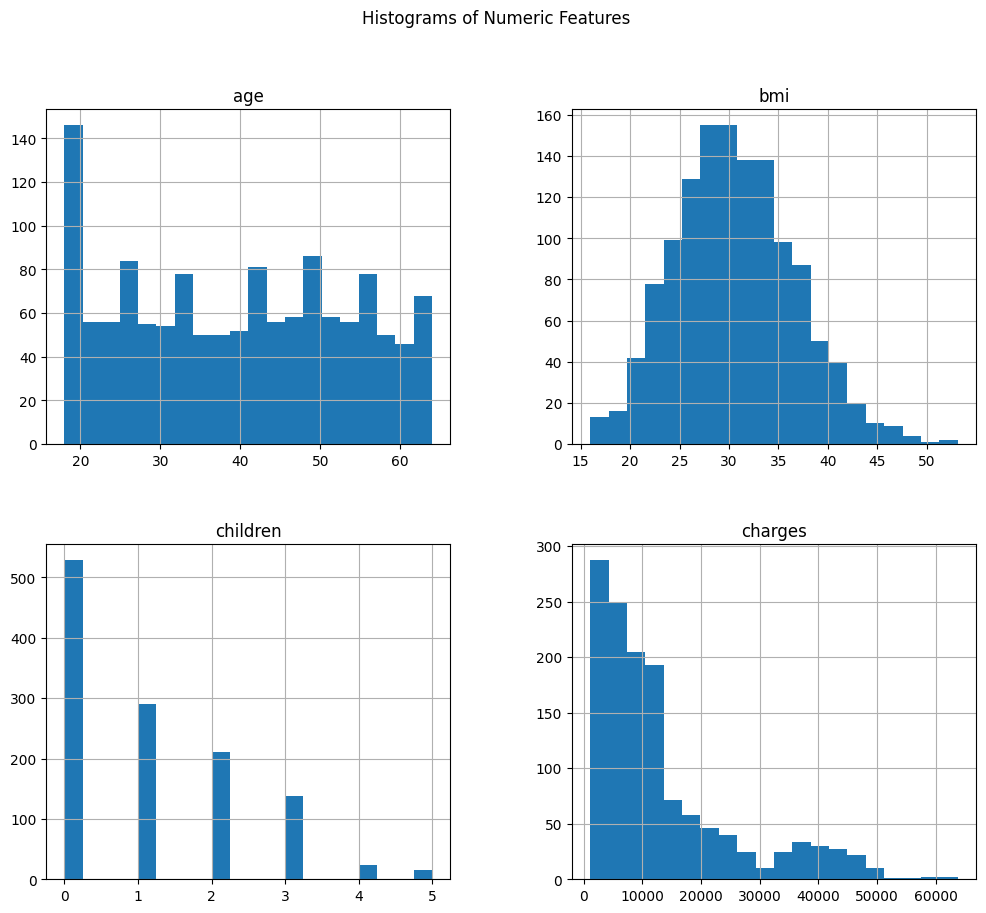

In [61]:
# Visualization: Subplots only for the numeric cols
df.hist(figsize=(12, 10), bins=20, layout=(2,2))
plt.suptitle("Histograms of Numeric Features")
plt.show()

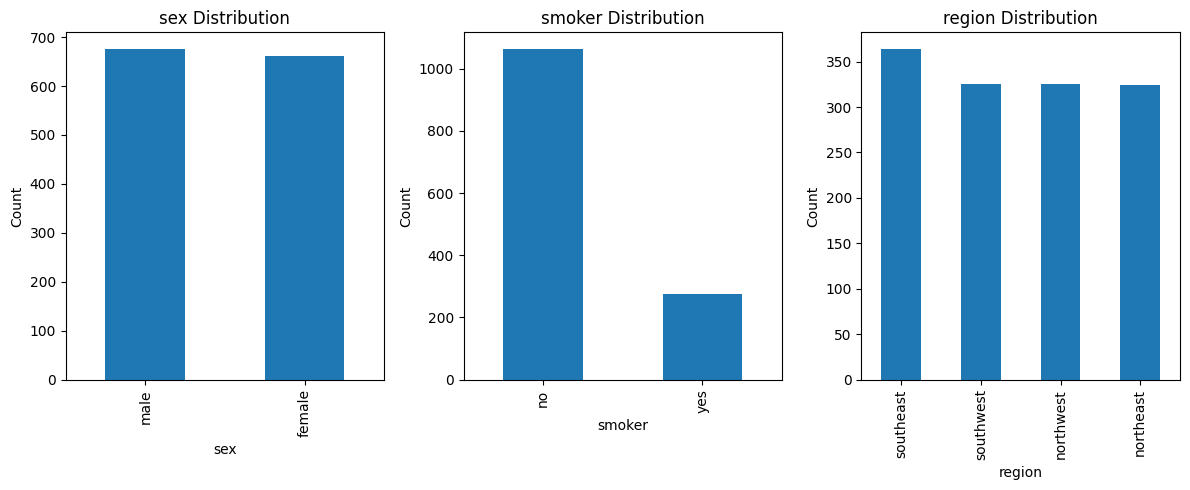

In [62]:
# Visualization: Subplots only for the non-numeric cols
categorical_cols = df.select_dtypes(exclude='number').columns

plt.figure(figsize=(12,5))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, len(categorical_cols), i)
    df[col].value_counts().plot(kind='bar')
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

### Pairplots

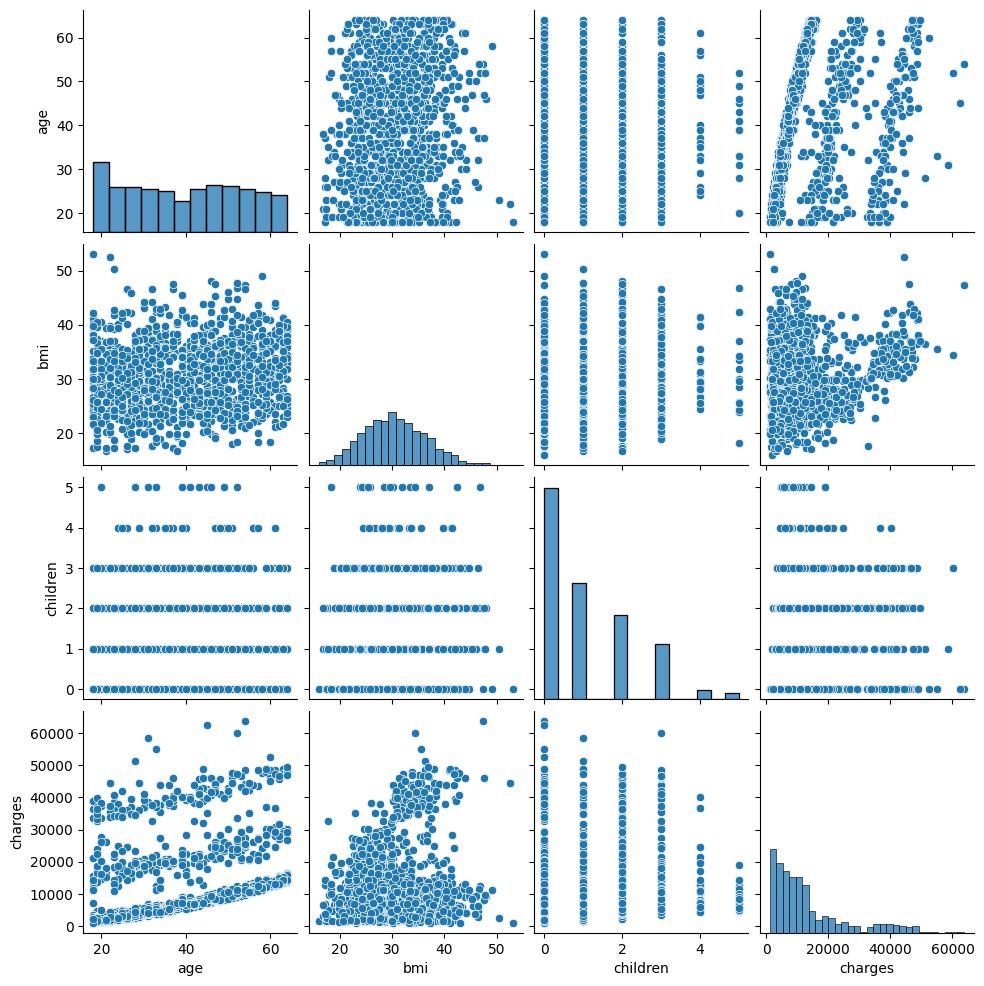

In [63]:
# Using pairplots for numeric data
sns.pairplot(df[num_cols])
plt.show()

## *Observations for question 1*

#### _Distribution of Values_ ####
- Age: The histogram shows a relatively uniform distribution across adult age groups, with a slight concentration in the late 20s to early 40s.
- BMI: Appears normally distributed, centred around 30–35, which is in the overweight range.
- Children: Strongly skewed towards 0–2 children, with very few individuals having more than 3.
- Charges: Highly right-skewed. Most individuals incur lower medical costs, but a few have extremely high charges, indicating potential outliers or high-risk cases.

#### _Correlations Between Features_ ####
- Age vs Charges: Moderate positive correlation (~0.30), suggesting older individuals tend to have higher medical costs.
- BMI vs Charges: Weak positive correlation (~0.17), indicating a slight tendency for higher BMI to be associated with higher charges.
- Children vs Charges: Very weak correlation, implying number of children doesn’t significantly affect medical charges.
- Smoker Status (from bar chart): Although not numerically correlated in the matrix, the smoker distribution suggests a strong impact on charges—smokers likely contribute to the high-charge outliers.

#### _Unusual Patterns & Outliers_ ####

- Charges: The distribution and scatter plots reveal several extreme values—individuals with charges far above the norm. These are likely outliers and may represent cases with chronic illness or high-risk profiles.
- BMI vs Charges: A few individuals with very high BMI also show high charges, but not consistently—suggesting BMI alone isn’t a strong predictor.
- Smoker Status: The imbalance in smoker vs non-smoker counts (~300 smokers vs ~1000 non-smokers) combined with the skew in charges hints that smokers may disproportionately contribute to high medical costs.

### Examining categorical and numerical features

In [64]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1318 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1284 non-null   float64
 3   children  1205 non-null   float64
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.3+ KB


age         float64
sex          object
bmi         float64
children    float64
smoker       object
region       object
charges     float64
dtype: object

In [65]:
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age          float64
sex         category
bmi          float64
children     float64
smoker      category
region      category
charges      float64
dtype: object

# 🔸 Missing Values

In real-world datasets, we often encounter **missing values**.  
This means some entries in the dataset are not recorded or are left blank.  

### 🔹 Why do missing values occur?
- Human error (e.g., survey questions left unanswered).  
- Sensor/device errors (e.g., skipped sensor readings).  
- Privacy reasons (e.g., people not reporting their income).  
- Data corruption or transfer issues.  

Handling missing values correctly is important because they can affect the accuracy of analysis and machine learning models.  

---

## 🔹 Types of Missing Values

| **Type**                                | **Meaning**                                                                      | **Example**                                                                                           | **Difficulty**                                     |
| --------------------------------------- | -------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------- | -------------------------------------------------- |
| **MCAR** (Missing Completely At Random) | Missing values occur randomly, unrelated to any data.                            | A sensor randomly skips a reading.                                                                    |  Easy to handle (no bias).                        |
| **MAR** (Missing At Random)             | Missingness depends on **other observed data**, not on the missing value itself. | Older people are less likely to report income (missingness depends on **age**, which is known).       |  Medium (can use imputation/statistical models). |
| **MNAR** (Missing Not At Random)        | Missingness depends on the **missing value itself**.                             | People with very high income do not report it (missingness depends on **income**, the missing value). |  Hard (needs assumptions or extra data).          |

---




In [66]:
df.info()
df.isna().sum()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1318 non-null   float64 
 1   sex       1338 non-null   category
 2   bmi       1284 non-null   float64 
 3   children  1205 non-null   float64 
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(4)
memory usage: 46.3 KB


age          20
sex           0
bmi          54
children    133
smoker        0
region        0
charges       0
dtype: int64

<Axes: >

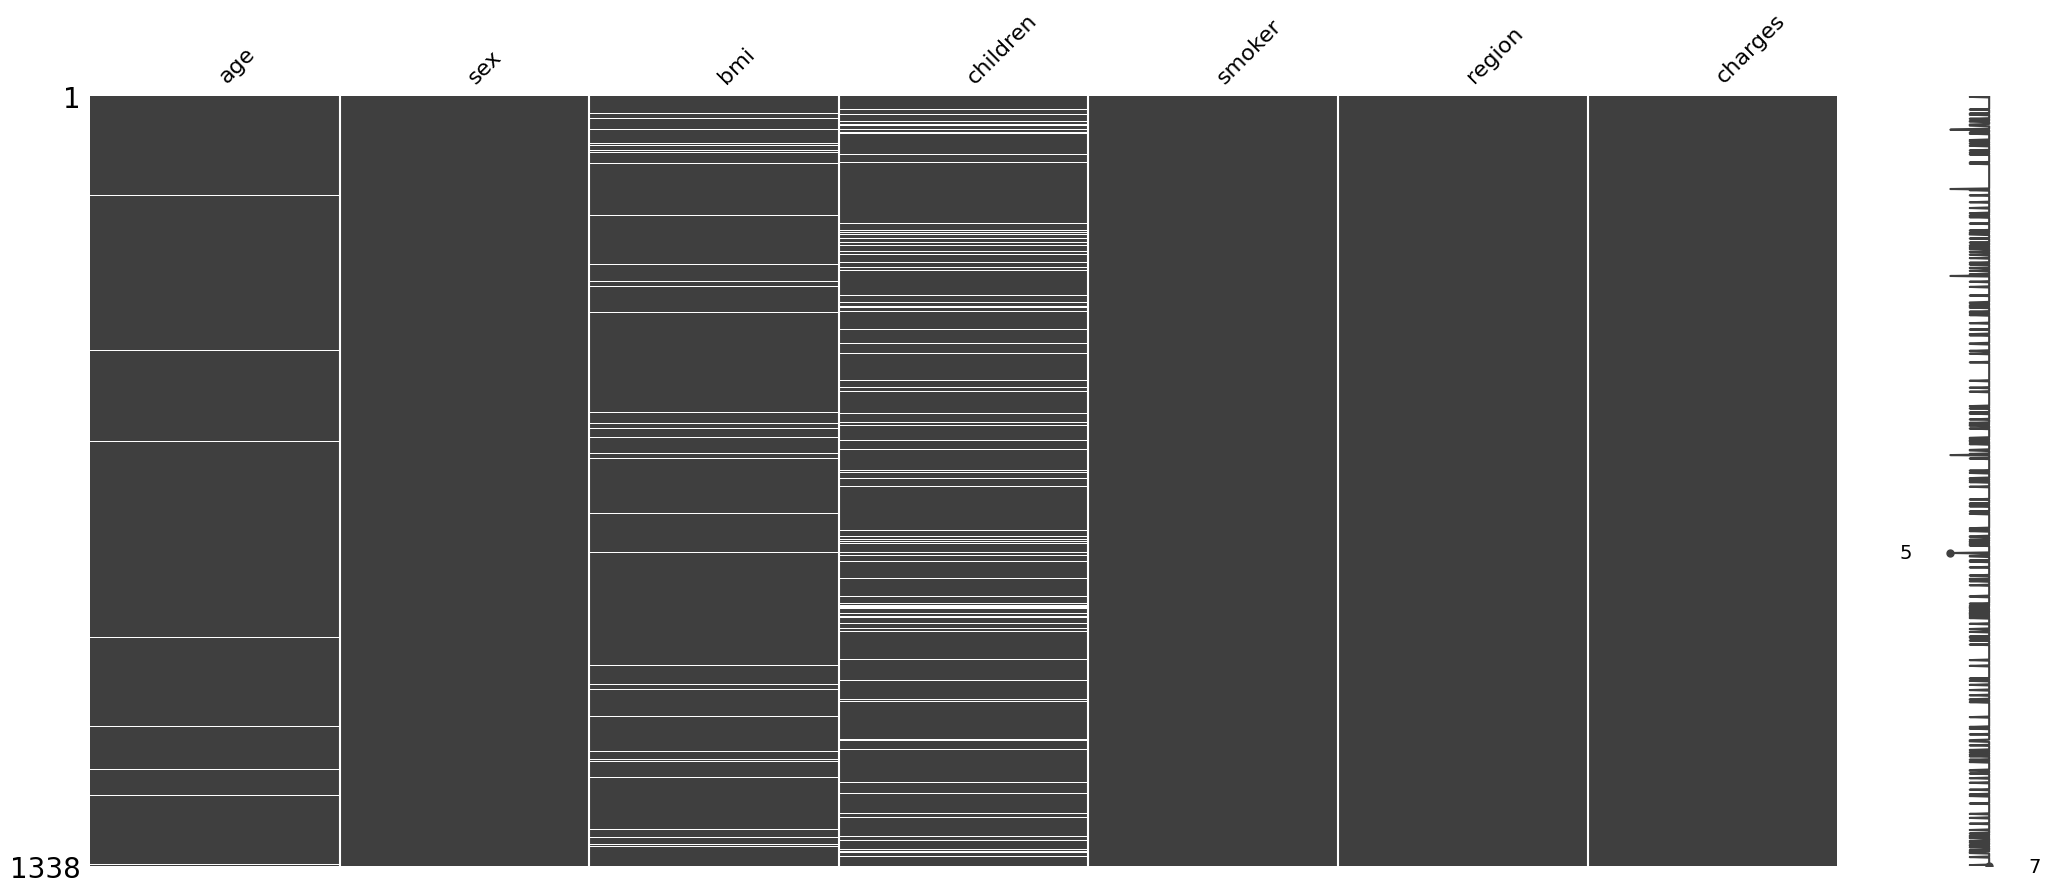

In [67]:
msno.matrix(df)

### Diagnose missing values

#  Question 2: Diagnosing Missing Values with Histograms

In this exercise, you will investigate **missing values** in a dataset and decide whether they are **MCAR, MAR, or MNAR**.  

We will use **histograms** to compare distributions of features with and without missing values.  

---

### **Your Coding Task**

Write a Python function called `diagnose_mv(df, mv_column)` that:

1. **Inputs**:
   - `df`: a pandas DataFrame  
   - `mv_column`: the column that has missing values  

2. **For each feature (column) in the dataset**:
   - Plot a **histogram** of the feature using **all rows** (this includes rows where `mv_column` is missing).  
   - Plot another **histogram** of the same feature, but only using rows where `mv_column` is **not missing**.  
   - Plot a **bar chart** showing the **absolute difference** between the two histograms (bin by bin).  

3. **Arrange the plots**:
   - Left → histogram with all rows  
   - Middle → histogram without rows where `mv_column` is missing  
   - Right → bar chart showing the difference  

---

### **Interpretation Task**

After you run your function and generate the histograms:

- Compare the shapes of the histograms.  
- Decide whether the missingness in your dataset looks like **MCAR, MAR, or MNAR**.  
- Write your conclusion in a **text cell** (5–10 sentences) explaining what you observed.  


### Function: Diagnose Missing Values

In [68]:
# The function for diagnosing the missing values
def diagnose_mv(df, mv_column):
    print("------------------------------------------------------\n")
    print(f">>> Diagnosing Missing Values for column: {mv_column}\n")
    print("------------------------------------------------------")

    for col in df.columns:
        data_all = df[col]
        data_not_missing = df[df[mv_column].notna()][col]

        fig, axes = plt.subplots(1, 3, figsize=(15, 4))
        fig.suptitle(f"Column: {col}", fontsize=14)

        if pd.api.types.is_numeric_dtype(df[col]):
            # -------------------- Numeric --------------------
            bins = np.arange(df[col].min()-0.5, df[col].max()+1.5, 1) if col=='children' else 10
            hist_all, edges = np.histogram(data_all.dropna(), bins=bins)
            hist_nm, _ = np.histogram(data_not_missing.dropna(), bins=edges)
            diff = np.abs(hist_all - hist_nm)

            axes[0].hist(data_all.dropna(), bins=edges, color='skyblue', edgecolor='black', rwidth=0.8)
            axes[0].set_title(f"{col}: All Rows")

            axes[1].hist(data_not_missing.dropna(), bins=edges, color='lightgreen', edgecolor='black', rwidth=0.8)
            axes[1].set_title(f"{col}: Where '{mv_column}' Is Not Missing")

            axes[2].bar(range(len(diff)), diff, color='salmon', edgecolor='black')
            axes[2].set_xticks(range(len(diff)))
            axes[2].set_xticklabels([f"{edges[i]:.1f}-{edges[i+1]:.1f}" for i in range(len(edges)-1)], rotation=45)
            axes[2].set_title("Abs Diff")

        else:
            # -------------------- Categorical --------------------
            all_counts = data_all.value_counts(dropna=False)
            nm_counts = data_not_missing.value_counts(dropna=False)
            all_index = all_counts.index.union(nm_counts.index)
            all_counts = all_counts.reindex(all_index, fill_value=0)
            nm_counts = nm_counts.reindex(all_index, fill_value=0)
            diff = (all_counts - nm_counts).abs()

            all_counts.plot(kind="bar", ax=axes[0], color="skyblue", edgecolor="black")
            axes[0].set_title(f"{col}: All Rows")

            nm_counts.plot(kind="bar", ax=axes[1], color="lightgreen", edgecolor="black")
            axes[1].set_title(f"{col}: Where '{mv_column}' Is Not Missing")

            diff.plot(kind="bar", ax=axes[2], color="salmon", edgecolor="black")
            axes[2].set_title("Abs Diff")

        plt.tight_layout()
        plt.show()

#### * Children

------------------------------------------------------

>>> Diagnosing Missing Values for column: children

------------------------------------------------------


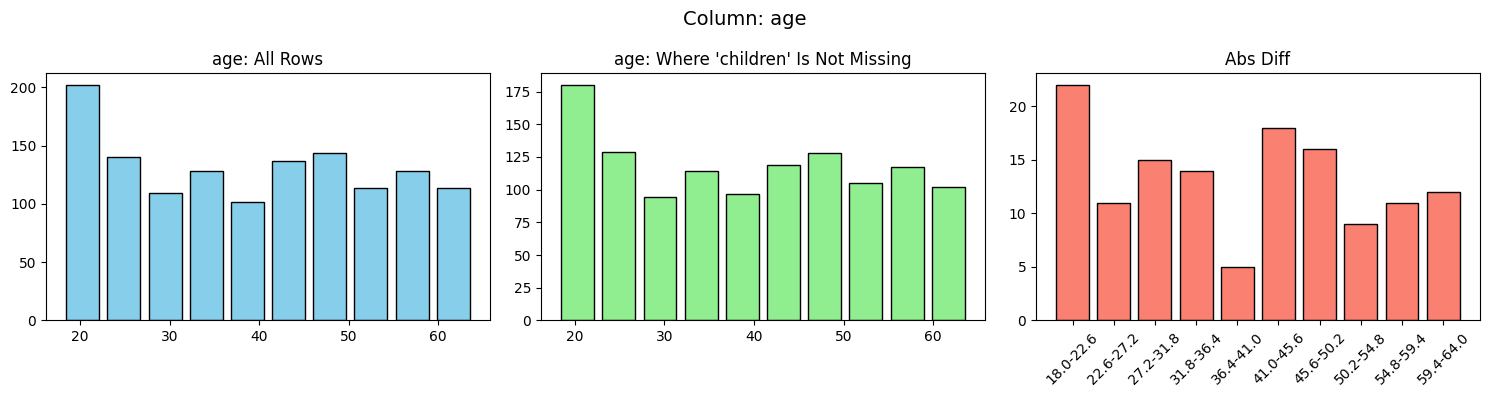

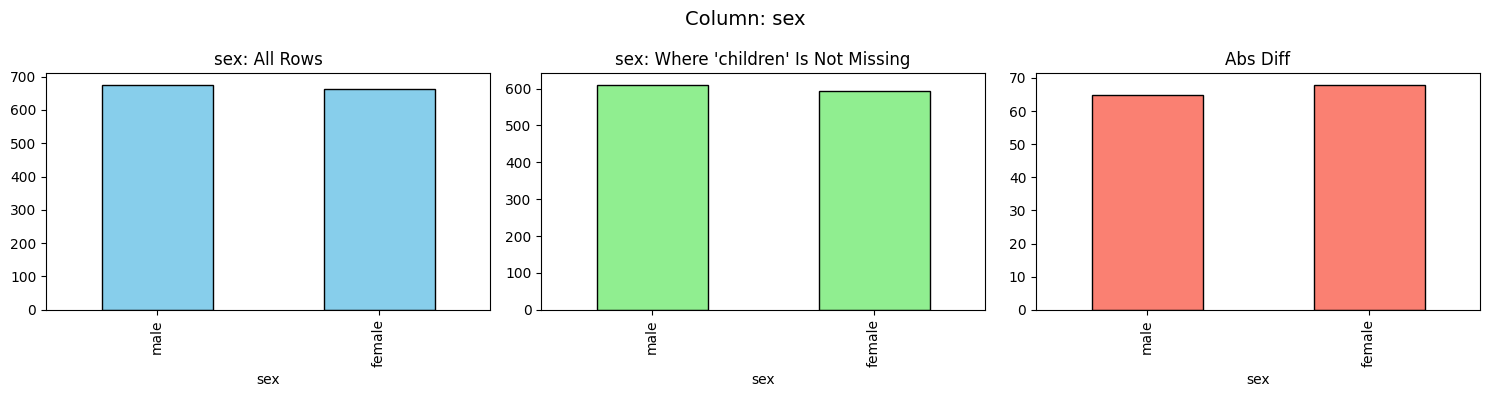

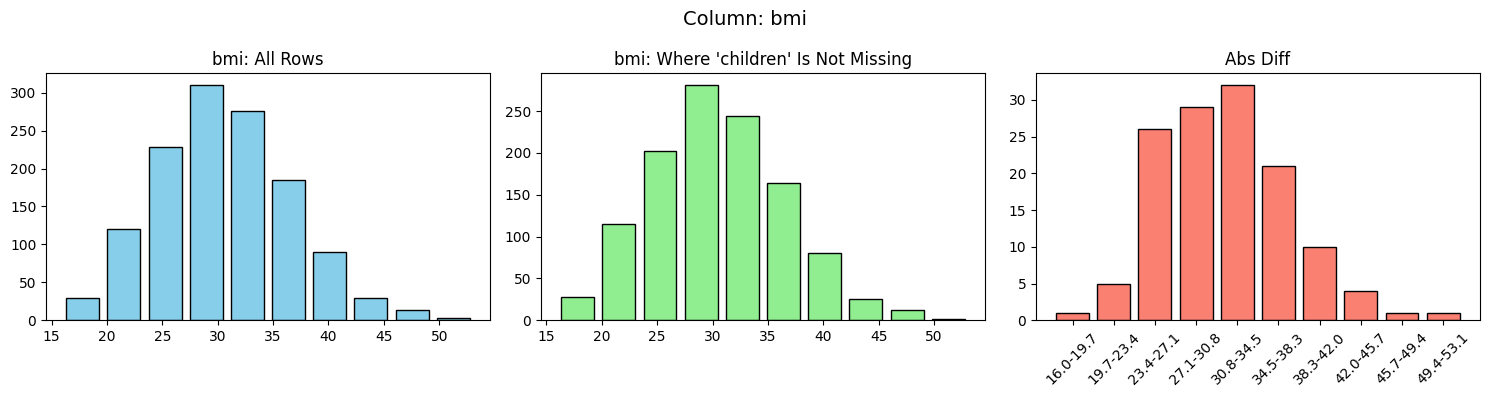

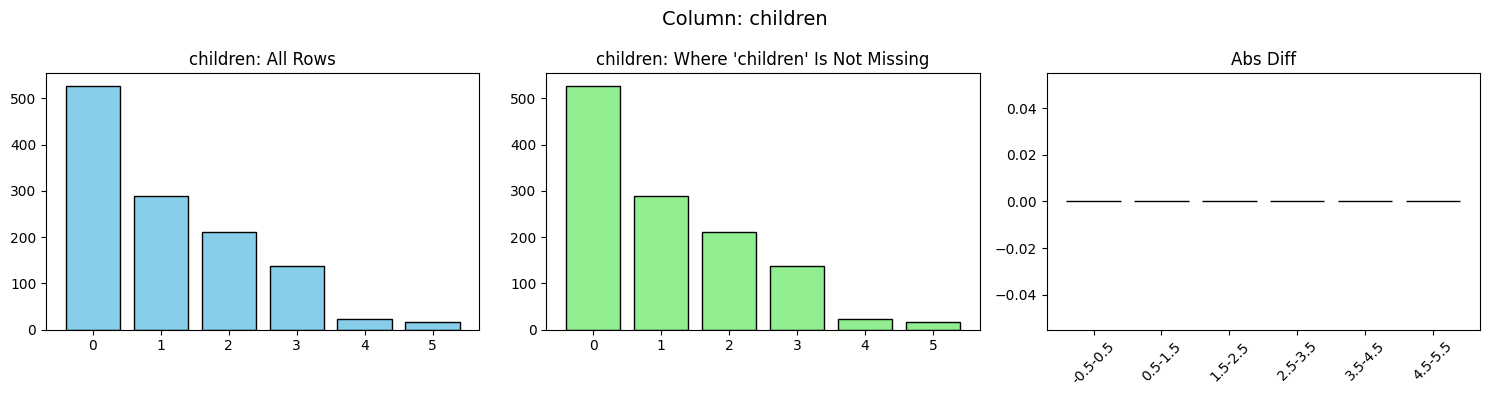

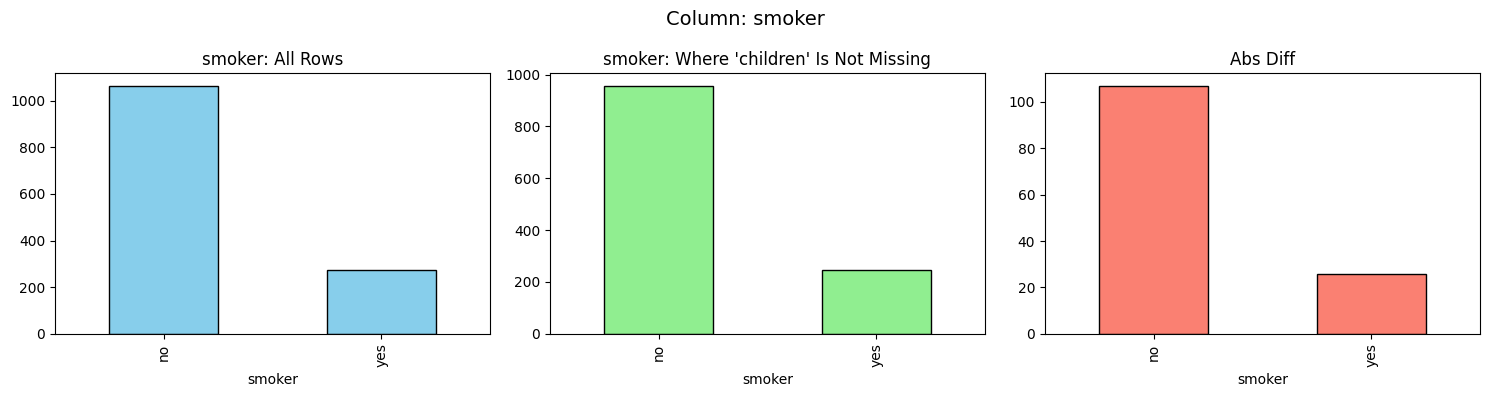

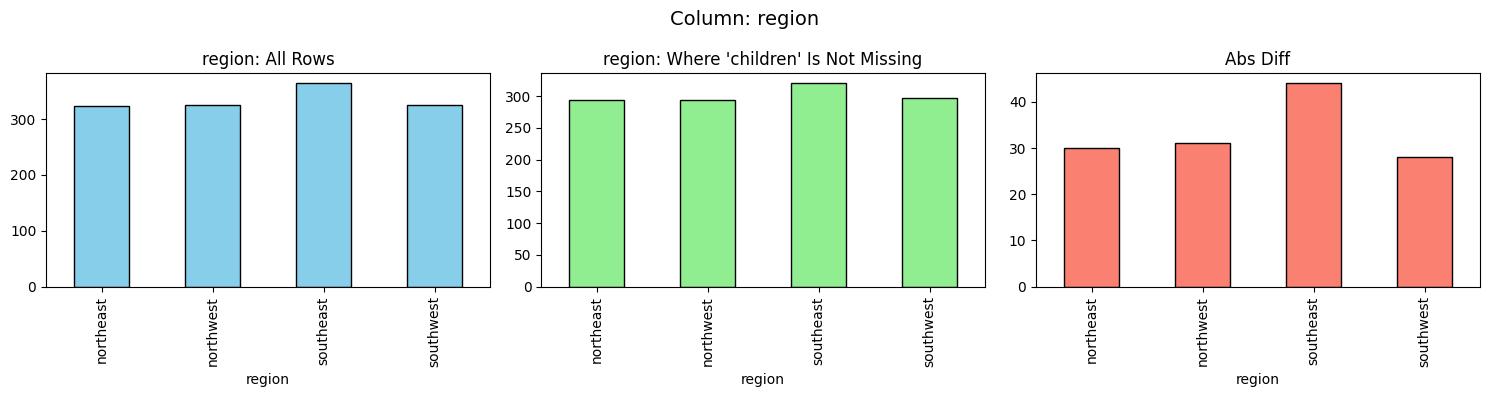

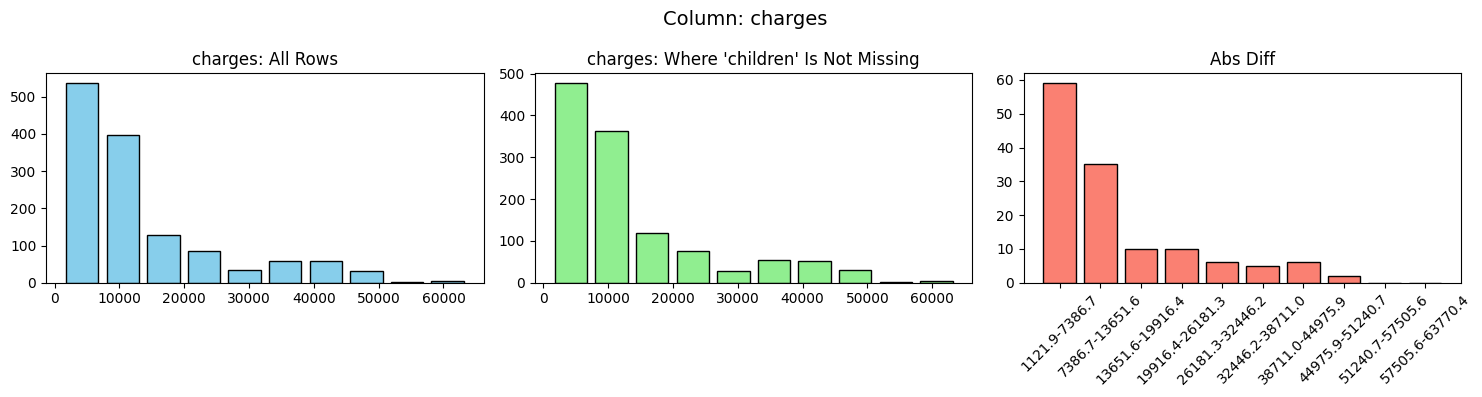

In [69]:
# Missing Values for "children"
diagnose_mv(df, 'children')

#### * BMI

------------------------------------------------------

>>> Diagnosing Missing Values for column: bmi

------------------------------------------------------


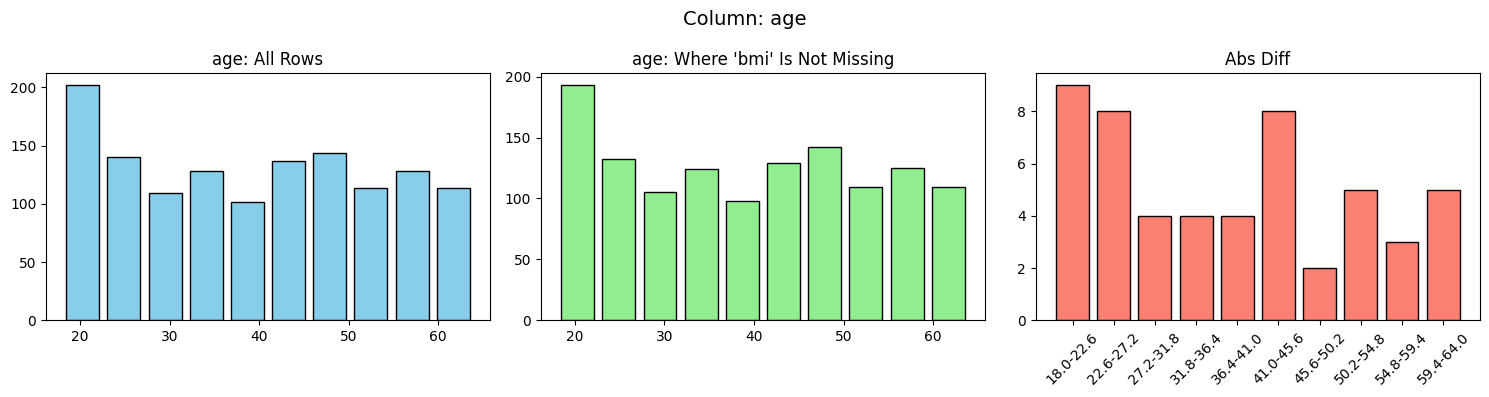

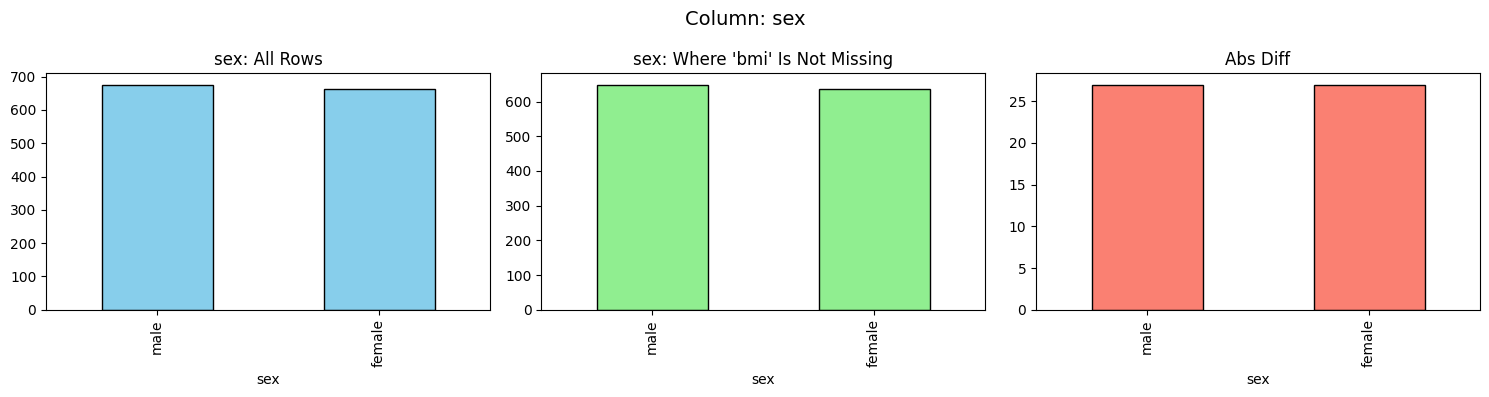

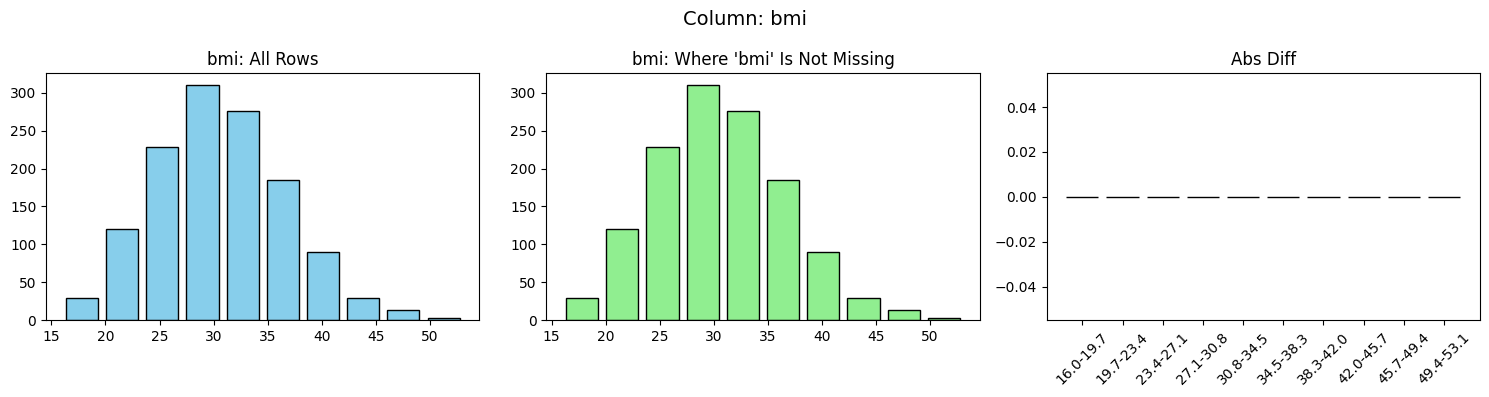

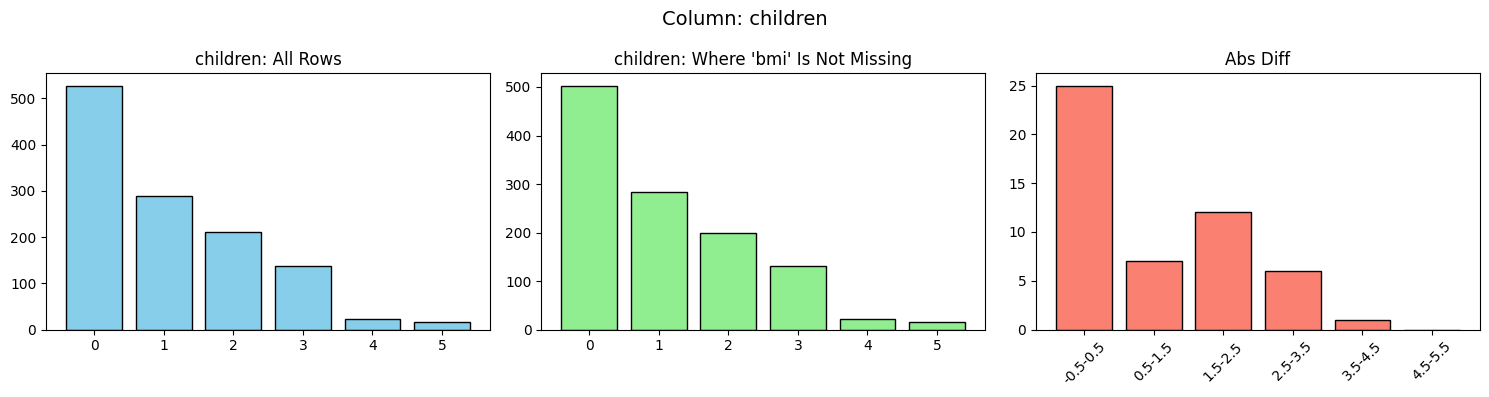

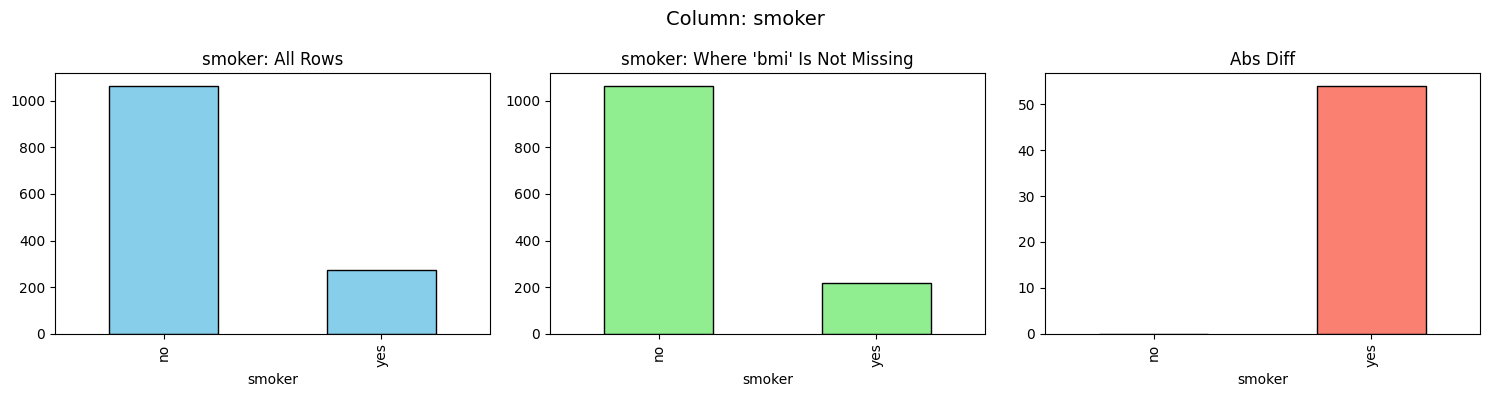

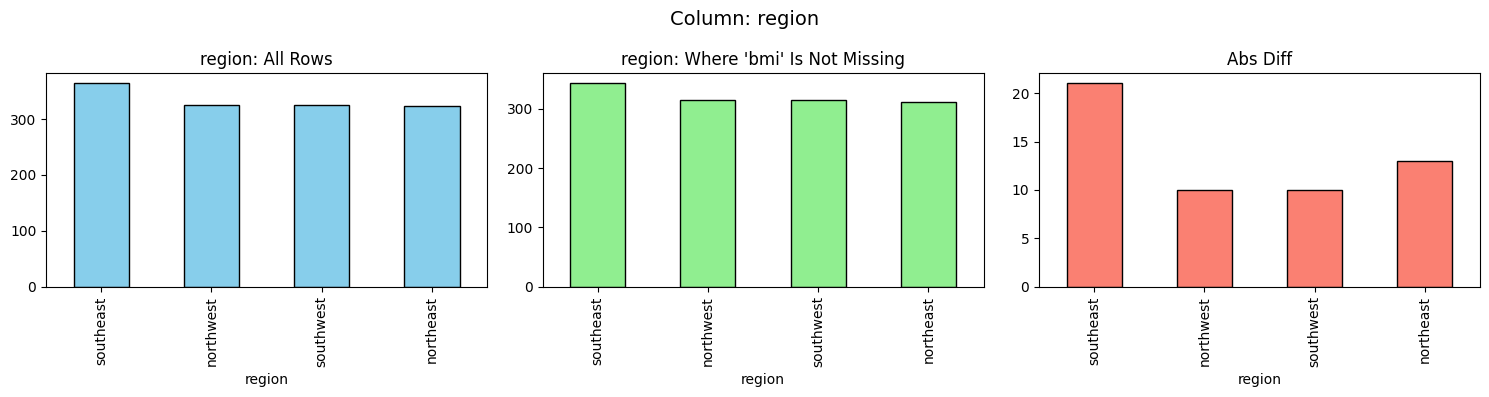

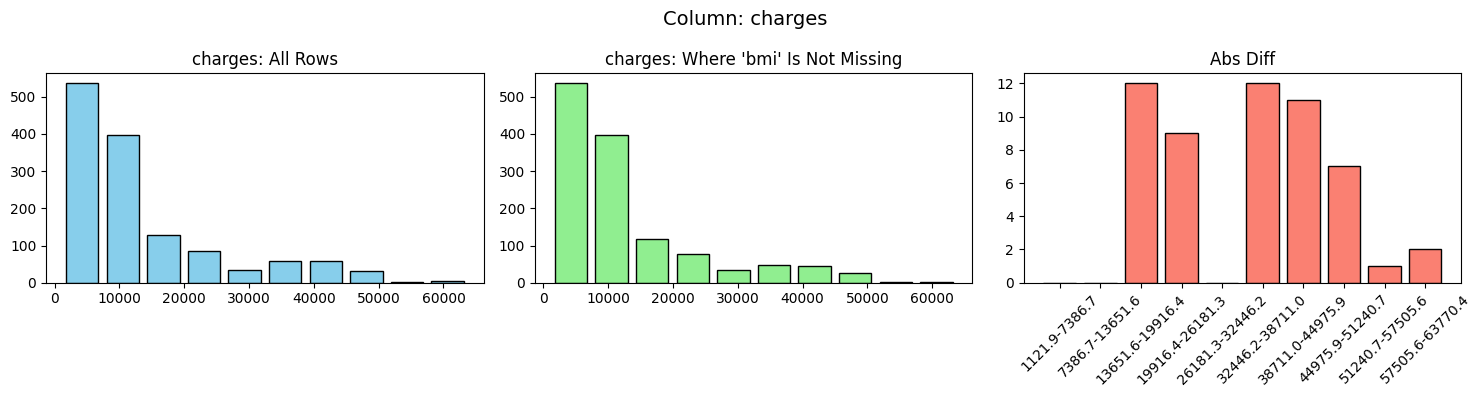

In [70]:
# Missing Values for "bmi"
diagnose_mv(df, 'bmi')

#### * Age

------------------------------------------------------

>>> Diagnosing Missing Values for column: age

------------------------------------------------------


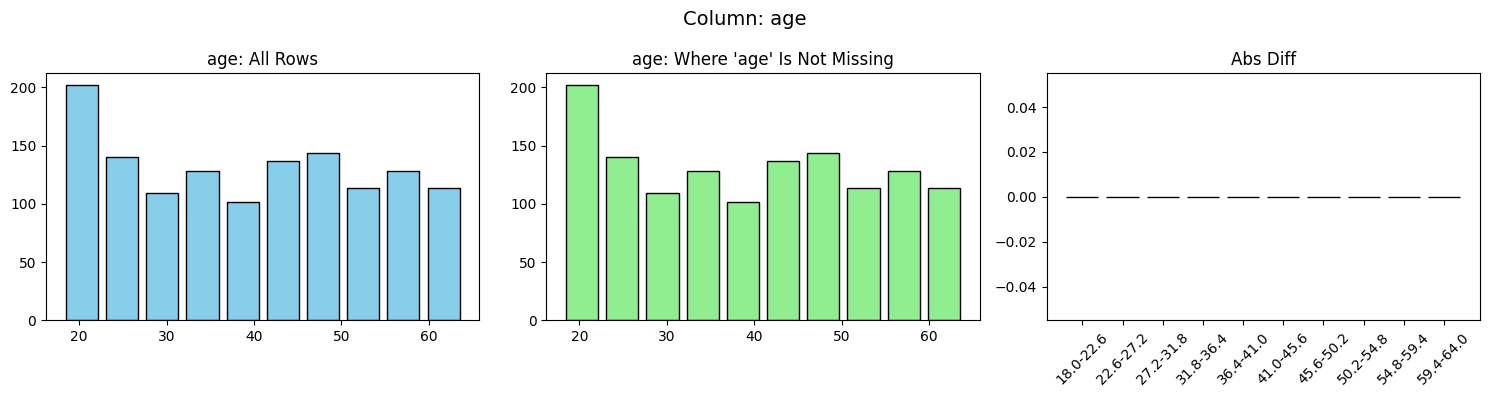

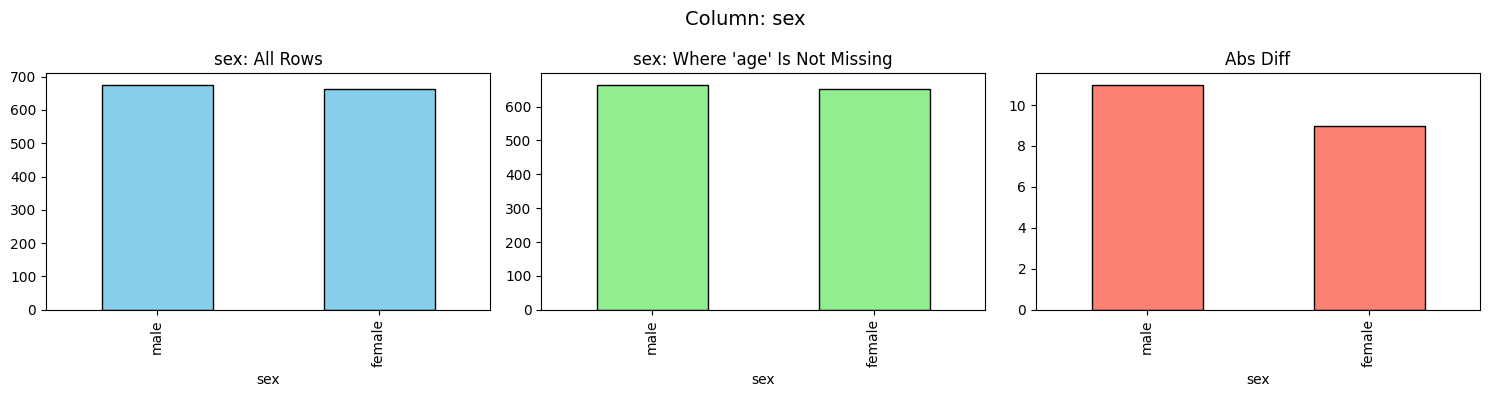

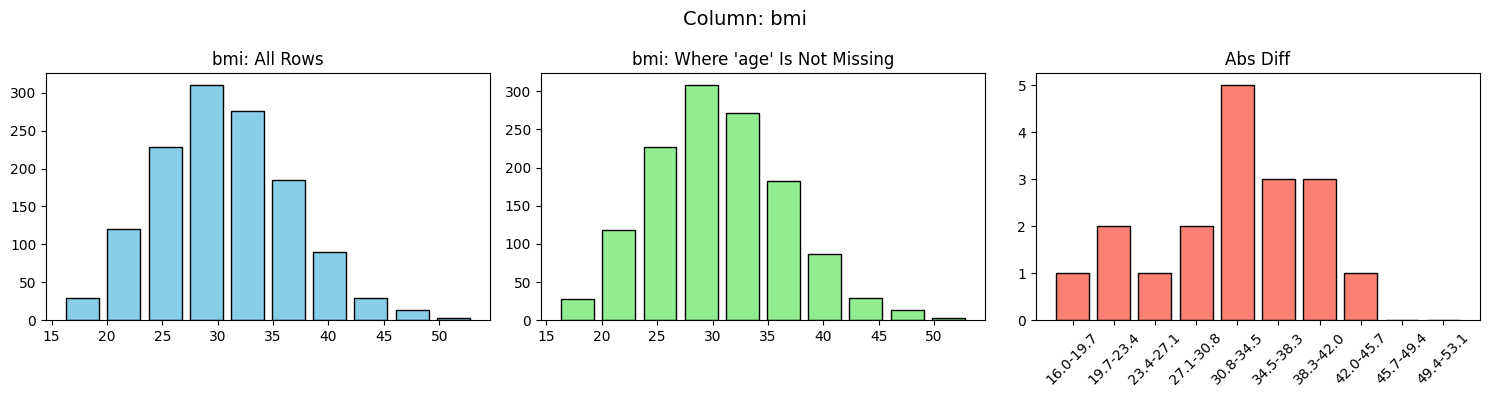

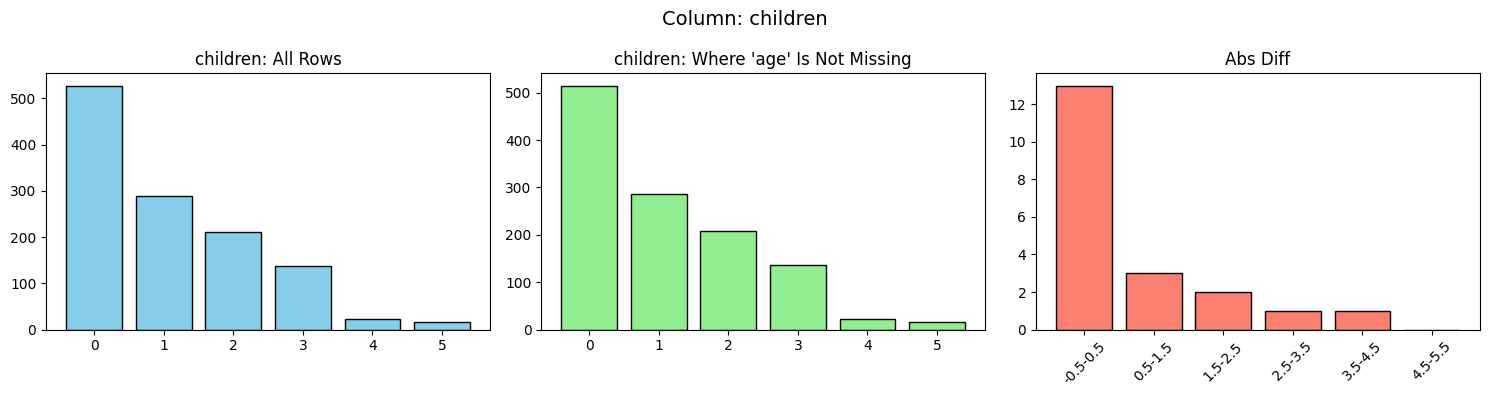

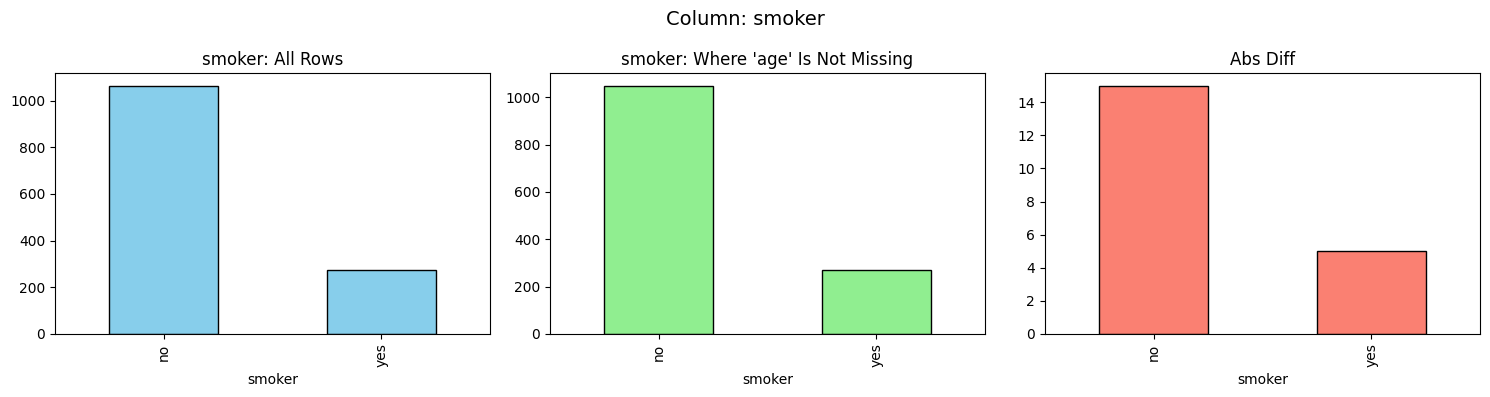

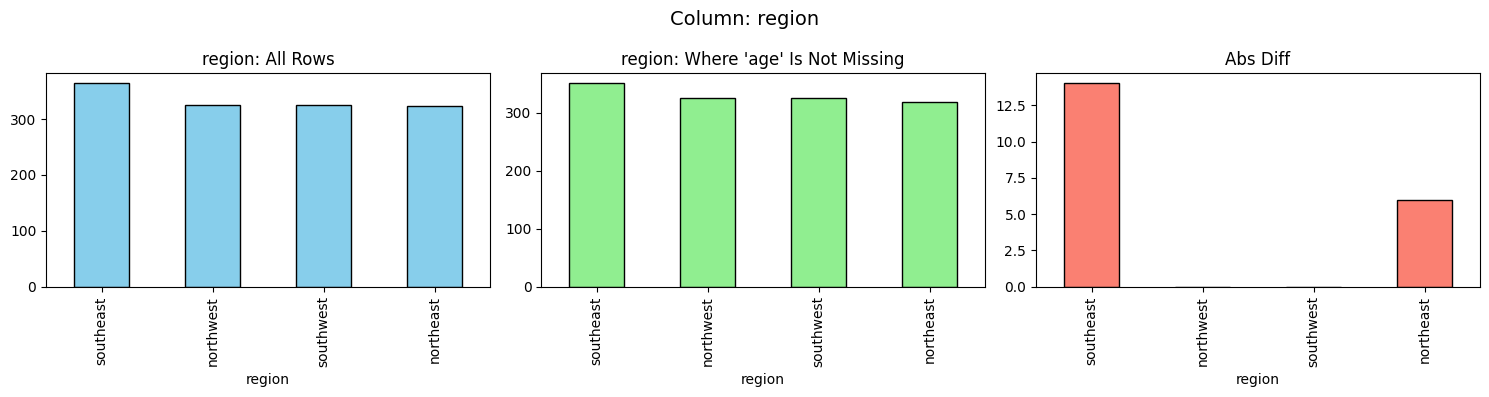

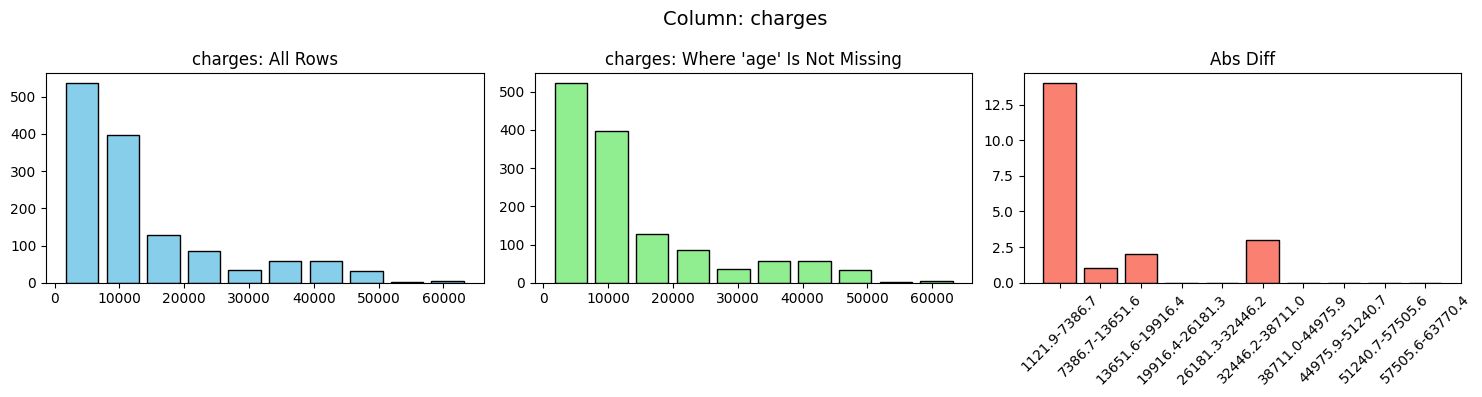

In [71]:
# Missing Values for "age"
diagnose_mv(df, 'age')

## *Interpretations for question 2*

After examining the histograms generated for the columns with missing values (**age**, **BMI**, and **children**), it is evident that the missingness is not entirely random for all features.

- **Age**: The distributions of other variables, such as *children*, *region*, *charges*, *sex*, *smoker*, and *BMI*, differ noticeably between rows with missing **age** and those without. This suggests that the probability of **age** being missing depends on other observed variables, indicating that the missingness is **Missing At Random (MAR)**.

- **BMI**: Similarly, missing **BMI** values show shifts in distributions for *age*, *smoker*, *region*, and *charges*, while *sex* remains largely unaffected. This also points to **MAR**, as missingness appears related to certain observed features rather than occurring completely at random.

- **Children**: For the **children** column, most features show nearly identical distributions between missing and non-missing rows. Only slight deviations appear for *smoker*, *BMI*, and *age*. Overall, this suggests that missingness in **children** is largely **Missing Completely At Random (MCAR)**, with only weak signals of **MAR** in some cases.

In summary, the missingness in the dataset varies by column: **age** and **BMI** are best classified as **MAR**, while **children** is mostly **MCAR**. There is no strong evidence of **Missing Not At Random (MNAR)** in these features. Understanding these patterns is important for selecting appropriate imputation strategies, as **MAR** columns can be imputed using relationships with other variables, while **MCAR** columns can be imputed with simpler methods like mean, median, or mode.

# 🔸 Handling Missing Values

Once we identify the type of missing data, we need to choose the right strategy to handle it.  
Different approaches are suitable for **MCAR, MAR, and MNAR**.  

---

## Handling Strategies

| **Type** | **Best Handling Methods** | **Notes** |
|----------|---------------------------|-----------|
| **MCAR** (Missing Completely At Random) | - Drop rows with missing values (safe, no bias) <br> - Drop entire column (if too many missing values) <br> - Simple imputation (mean, median, mode) | Since missingness is random, any method works without bias. |
| **MAR** (Missing At Random) | - Use **imputation based on other features** (regression imputation, KNN imputer, multiple imputation) <br> - Group-wise imputation (e.g., fill income by median per age group) | Missingness is linked to other variables, so we must use them to estimate. |
| **MNAR** (Missing Not At Random) | - Add a “missing” indicator/flag column <br> - Use **domain knowledge** or expert rules to fill values <br> - Sensitivity analysis <br> - Sometimes drop rows (but may bias results) | Hardest to handle because the missingness depends on the missing value itself. Often needs external info or careful modeling. |

---

 **Summary:**  
- **MCAR** → easiest, can drop or use simple fill (mean/median/mode).  
- **MAR** → medium, use relationships with other features to impute.  
- **MNAR** → hardest, may need domain knowledge, missing flags, or more data.  


## Question 3: Handling Different Types of Missing Values

Now that you know how to identify MCAR, MAR, and MNAR, let’s practice handling them in a dataset.  

### **Your Task**

For each of the following cases, apply the correct method to handle missing values:  

1. **MCAR**  
   - Missing values are random.  
   - Replace missing values with the **mode** (most frequent value).  

2. **MAR**  
   - Missing values depend on another variable.  
   - Use **conditional imputation**, such as replacing missing values with the **median** (or mean) within subgroups.  

3. **MNAR**  
   - Missing values depend on the value itself.  
   - Handle them by **dropping rows** with missing values, or by creating a **“missing” indicator column**.  

---

After handling the missing values:  
- Use `msno.matrix(df)` (or another visualization) to verify that there are no missing values left.  
- In a **text cell**, explain in 2–3 sentences why you chose:  
  - Mode for MCAR  
  - Median (conditional) for MAR  
  - Row deletion (or indicator) for MNAR  


### Handling Missing Values

#### * Children

In [72]:
# Impute missing children values with mode (MCAR)
df['children'].fillna(df['children'].mode()[0], inplace=True)

# ✅ Check
print("Missing values in 'children':", df['children'].isna().sum())


Missing values in 'children': 0


C:\Users\hp\AppData\Local\Temp\ipykernel_23408\3315359298.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(df['children'].mode()[0], inplace=True)


#### * BMI

In [73]:
# Impute missing bmi values using median per smoker group (MAR)
df['bmi'] = df['bmi'].fillna(df.groupby('smoker')['bmi'].transform('median'))

# ✅ Check
print("Missing values in 'bmi':", df['bmi'].isna().sum())


Missing values in 'bmi': 0


C:\Users\hp\AppData\Local\Temp\ipykernel_23408\2712357961.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['bmi'] = df['bmi'].fillna(df.groupby('smoker')['bmi'].transform('median'))


#### * Age

In [74]:
# Impute missing values in 'age' using median per region (MAR)
df['age'] = df['age'].fillna(df.groupby('region')['age'].transform('median'))

# ✅ Check
print("Missing values in 'age':", df['age'].isna().sum())


Missing values in 'age': 0


C:\Users\hp\AppData\Local\Temp\ipykernel_23408\2043952197.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['age'] = df['age'].fillna(df.groupby('region')['age'].transform('median'))


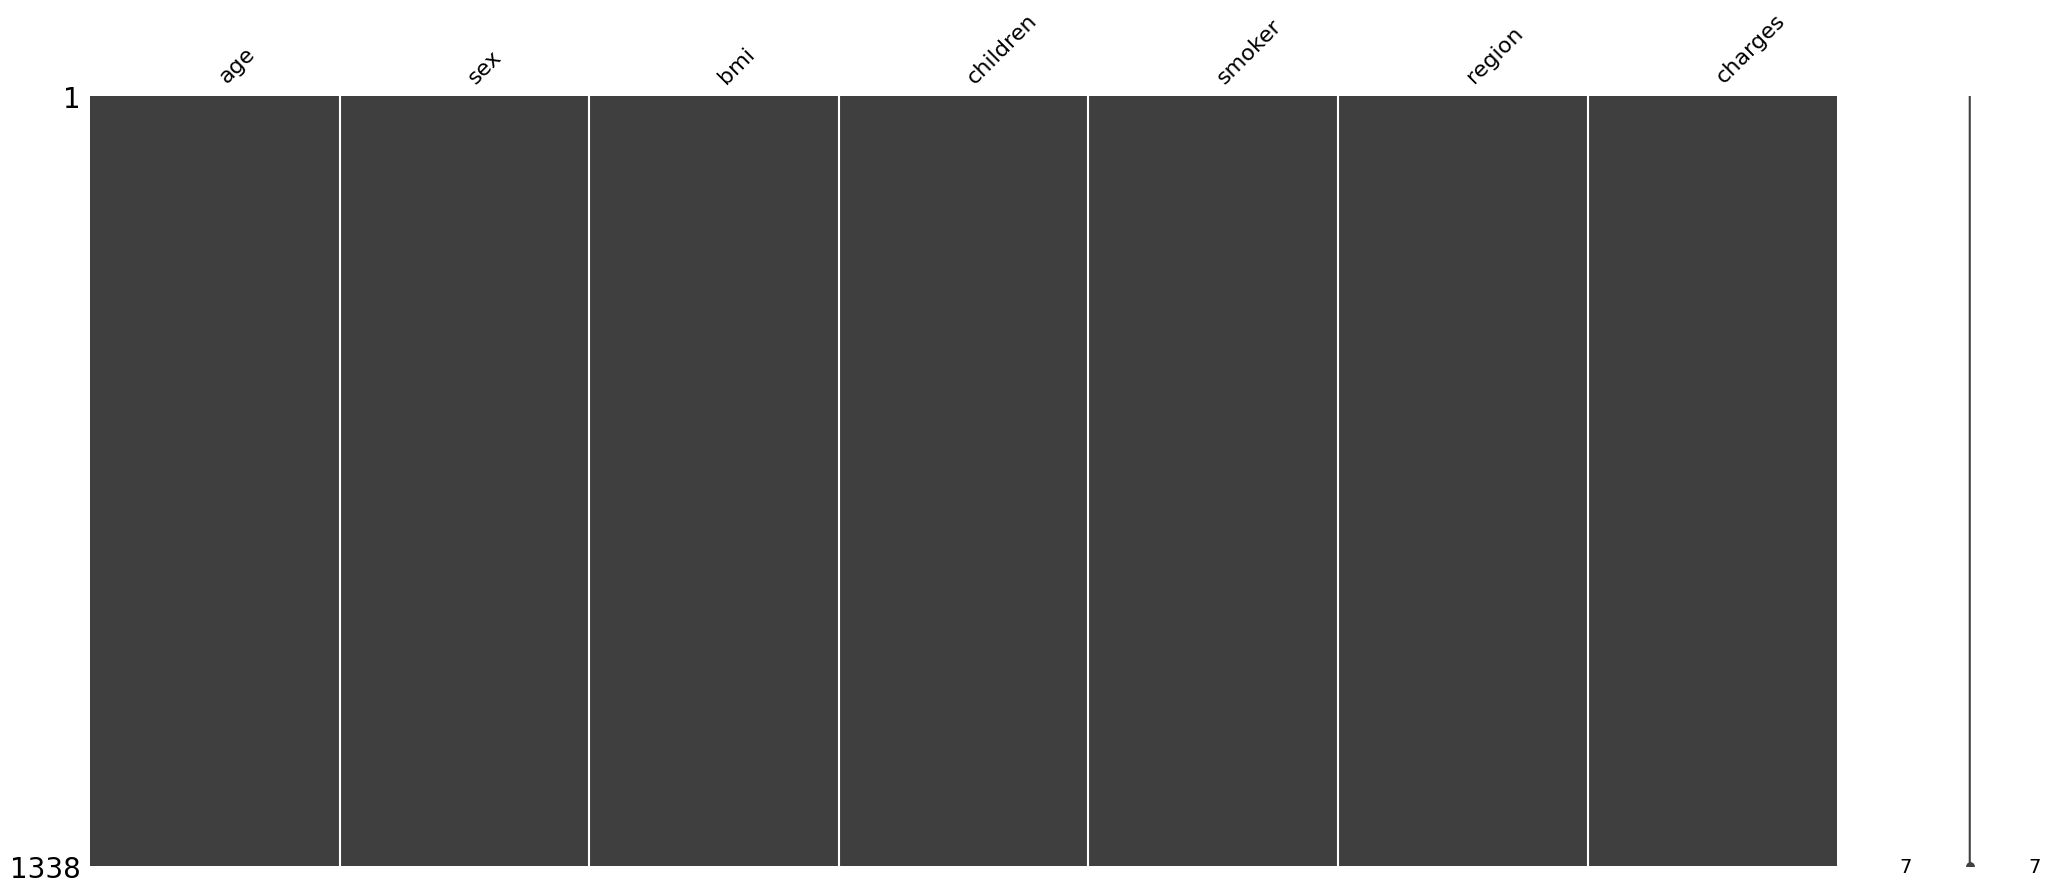

In [75]:
# Visualize missing values
msno.matrix(df)
plt.show()


## *Interpretations for question 3*

**Missing value handling explanation:**

For MCAR, missing values are completely random and not related to other variables, so using the mode is appropriate because it provides a simple and unbiased replacement. For MAR, missingness depends on other observed variables, so conditional imputation using the median preserves relationships within groups and reduces bias. For MNAR, missingness depends on the value itself, which requires either row deletion or a missing indicator to account for the systematic pattern, though this was not needed in my analysis.

#  Encoding and Attribute Construction

Machine learning models usually need **numeric input**, but real-world datasets often contain **categorical data** (like colors, countries, or product types).  
To use this data in models, we apply **encoding techniques** that convert categories into numbers.  
We can also create **new features** from existing ones — this is called **attribute construction** (or feature engineering).  

---

### **Types of Encoding**

1. **Label Encoding**
- Converts categories into numbers (integers).  
- Best for **ordinal data** (where order matters, like Small < Medium < Large).  
-  Not good for nominal data because numbers may wrongly imply ranking.  

2. **One-Hot Encoding**
- Creates a separate binary column for each category.  
- Best for **nominal data** (where order does not matter, like Red, Blue, Green).  
-  Can increase dataset size if there are many categories.  

3. **Attribute Construction (Feature Engineering)**
- Creates new features (categorical or numerical) from existing ones.  
- Useful for adding more **meaningful information** to the dataset.  
- Example: From a date, we can extract **Day, Hour, Is_Weekend**.  

---

###  Summary Table

| **Method**              | **What it Does**                                  | **Example (Input)**          | **Example (Output)**                                             | **When to Use** |
|--------------------------|---------------------------------------------------|-------------------------------|------------------------------------------------------------------|-----------------|
| **Label Encoding**       | Assigns each category a number.                   | Size = {Small, Medium, Large} | Small=0, Medium=1, Large=2                                       | For **ordinal** data (ordered categories). |
| **One-Hot Encoding**     | Creates a binary column for each category.        | Color = {Red, Green, Blue}    | Red → [1,0,0], Green → [0,1,0], Blue → [0,0,1]                  | For **nominal** data (unordered categories). |
| **Attribute Construction** | Creates new categorical or numerical features from existing ones. | Date = `2023-09-13 14:35:00` | New Features → `Day = Wednesday`, `Hour = 14`, `Is_Weekend = No` | When we want to extract **useful patterns** from existing attributes. |

---

 In short:  
- **Label Encoding** = numbers for ordered categories.  
- **One-Hot Encoding** = binary columns for unordered categories.  
- **Attribute Construction** = build new features from existing ones.  


# **Question 4: Choosing the Right Encoding for Categorical Features**

In this exercise, you will decide which encoding method is most suitable for each categorical variable in the dataset, then apply it using scikit-learn.  

---

### **Your Task**

1. Inspect the dataset and identify the categorical features.  
   - Example: `sex`, `smoker`, `region`  

2. For each categorical feature:  
   - Suggest which type of encoding is **most appropriate** (Label Encoding, One-Hot Encoding, etc.).  
   - Explain why you chose that method.  

3. Apply the encoding using different classes from **`sklearn.preprocessing`**, such as:  
   - `LabelEncoder`  
   - `OneHotEncoder`  
   - `OrdinalEncoder`  

4. Compare your encoded dataset with the original:  
   - Which features are binary categorical?  
   - Which features are nominal categorical?  
   - Which features (if any) could be considered ordinal?  

5. In a **text cell**, write your explanation in 2–3 sentences for each feature:  
   - Why you chose that encoding method.  
   - Why another method might not be appropriate.  


### Categorical Features

In [76]:
# Type of cols
print("Column dtypes:")
print(df.dtypes)

Column dtypes:
age          float64
sex         category
bmi          float64
children     float64
smoker      category
region      category
charges      float64
dtype: object


In [77]:
# printing the categorical features
cat_cols = df.select_dtypes(include=['category']).columns.tolist()
print("\nCategorical features detected:", cat_cols)


Categorical features detected: ['sex', 'smoker', 'region']


### Encoding type

**Encoding Type Suggestion**
- sex → Binary → Label Encoding (0/1).
Reason: only two categories; numeric 0/1 is sufficient for models and simpler than creating two dummy columns.
- smoker → Binary → Label Encoding (0/1).
Reason: same as sex.
- region → Nominal (4 categories) → One-Hot Encoding.
Reason: no natural order between regions; one-hot avoids introducing spurious ordering.

(No column appears ordinal in this dataset, so OrdinalEncoder is not appropriate for these features.)

### Apply Encoding

### Scikit-learn

In [78]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [79]:
# Make a copy of the dataset
df_encoded = df.copy()

# Encode binary categorical variables with LabelEncoder
df_encoded['sex'] = LabelEncoder().fit_transform(df['sex'])
df_encoded['smoker'] = LabelEncoder().fit_transform(df['smoker'])

# One-Hot Encode the 'region' column (keep all categories)
ohe = OneHotEncoder(sparse_output=False)
region_encoded = ohe.fit_transform(df[['region']])
region_df = pd.DataFrame(region_encoded, columns=ohe.get_feature_names_out(['region']))

# Merge back with main dataframe
df_encoded = pd.concat([df_encoded.drop(columns=['region']), region_df], axis=1)

# Show a sample
df_encoded.sample(5)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
933,45.0,0,35.300,0.0,0,7348.14200,0.0,0.0,0.0,1.0
6,46.0,0,33.440,1.0,0,8240.58960,0.0,0.0,1.0,0.0
402,64.0,0,32.965,0.0,0,14692.66935,0.0,1.0,0.0,0.0
311,19.0,0,24.700,0.0,0,1737.37600,0.0,0.0,0.0,1.0
433,60.0,0,30.500,0.0,0,12638.19500,0.0,0.0,0.0,1.0


***Comparison of Original vs Encoded Dataset***

Binary Categorical Features:
- sex, smoker
Nominal Categorical Features:
- region
Ordinal Features:
- None (no variable in this dataset has a natural order)

**Feature-wise Explanation**

***sex***
- This is a binary feature (male/female), so Label Encoding was chosen to convert it to 0/1.
- One-Hot Encoding would work but is unnecessary since there are only two categories; it would create an extra column without adding information.

***smoker***
- This is also binary (yes/no), so Label Encoding is sufficient.
- One-Hot Encoding is possible but redundant here, and Ordinal Encoding is not meaningful.

***region***
- This is a nominal feature with four categories, so One-Hot Encoding was used to create separate columns for each region.
- Label or Ordinal Encoding would introduce a fake numeric order (e.g., northeast < northwest < southeast < southwest), which could mislead models.
- Keeping all 4 columns preserves all information for modeling without implying any order.

# 🔸 Normalization vs Standardization

When working with datasets, features (columns) often have different scales.  
For example:  
- **Age** might range from 18 to 80  
- **Income** might range from 10,000 to 200,000  

Some machine learning models (like KNN, SVM, Neural Networks) are sensitive to these differences in scale.  
To fix this, we use **feature scaling** methods like **Normalization** and **Standardization**.  

---

##  Normalization (Min-Max Scaling)

- Rescales values to a fixed range, usually **[0, 1]**.  
- Formula:  

\[
x' = \frac{x - x_{min}}{x_{max} - x_{min}}
\]

- Example: If Age ranges from 18–80, then:  
  - 18 → 0.0  
  - 80 → 1.0  
  - 49 → ~0.5  

✔ Useful when features have very different ranges and we want everything between 0 and 1.  

---

##  Standardization (Z-Score Scaling)

- Rescales values so they have **mean = 0** and **standard deviation = 1**.  
- Formula:  

\[
x' = \frac{x - \mu}{\sigma}
\]

(where μ = mean, σ = standard deviation)  

- Example: If Age has mean = 40 and std = 10, then:  
  - Age 50 → (50-40)/10 = 1.0  
  - Age 30 → (30-40)/10 = -1.0  

✔ Useful for algorithms that assume data is normally distributed (e.g., Logistic Regression, SVM, PCA).  


# Question 5

1. Apply **Normalization** to your dataset using either a custom function or `MinMaxScaler` from `sklearn.preprocessing`.  
2. Apply **Standardization** to the same dataset using either a custom function or `StandardScaler`.  
3. Compare the results:  
   - Which features are now between 0 and 1?  
   - Which features now have mean ~0 and std ~1?  
4. In a **text cell**, explain in 2–3 sentences:  
   - When would you use **Normalization**?  
   - When would you use **Standardization**?  


### Apply Normalization

In [80]:
from sklearn.preprocessing import MinMaxScaler

# Copy the dataframe to preserve original
df_norm = df_encoded.copy()

# Select numeric columns only
num_cols = df_norm.select_dtypes(include=['float64']).columns

# Apply MinMaxScaler
scaler = MinMaxScaler()
df_norm[num_cols] = scaler.fit_transform(df_norm[num_cols])

# Show the result
df_norm.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0,0.321227,0.0,1,0.251611,0.0,0.0,0.0,1.0
1,0.478261,1,0.479150,0.2,0,0.009636,0.0,0.0,1.0,0.0
2,0.217391,1,0.458434,0.6,0,0.053115,0.0,0.0,1.0,0.0
3,0.326087,1,0.181464,0.0,0,0.333010,0.0,1.0,0.0,0.0
4,0.304348,1,0.347592,0.0,0,0.043816,0.0,1.0,0.0,0.0


### Apply Standardization

In [81]:
from sklearn.preprocessing import StandardScaler

# Copy the dataframe to preserve original
df_std = df_encoded.copy()

# Apply StandardScaler
scaler = StandardScaler()
df_std[num_cols] = scaler.fit_transform(df_std[num_cols])

# Show the result
df_std.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.488136,0,-0.456302,-0.816127,1,0.298584,-0.565267,-0.566418,-0.611324,1.765481
1,0.033633,1,0.532568,0.026449,0,-0.953689,-0.565267,-0.566418,1.635795,-0.566418
2,-0.835949,1,0.402853,1.711600,0,-0.728675,-0.565267,-0.566418,1.635795,-0.566418
3,-0.473623,1,-1.331461,-0.816127,0,0.719843,-0.565267,1.765481,-0.611324,-0.566418
4,-0.546089,1,-0.291210,-0.816127,0,-0.776802,-0.565267,1.765481,-0.611324,-0.566418


### Comparing Results

Features between 0 and 1 (Normalization):
- All numeric features (age, bmi, children, charges) are scaled to 0–1.
- Binary features (sex, smoker) and one-hot encoded region columns are already 0 or 1, so they are also in the 0–1 range.

Features with mean ~0 and std ~1 (Standardization):
- Numeric features (age, bmi, children, charges) now have mean ≈ 0 and standard deviation ≈ 1.
- Binary features (sex, smoker) and one-hot encoded region columns do not have mean 0 and std 1 because they are categorical, but this does not affect most algorithms.

### When Use Normalization VS. Standardization

**Normalization** is used when you want to scale features to a fixed range, typically 0–1, which is especially helpful for distance-based algorithms (like KNN) or neural networks where features need comparable magnitudes.

**Standardization** is used when you want features to have mean ~0 and standard deviation ~1, which is useful for algorithms that assume normally distributed inputs (like linear regression, logistic regression, or PCA) or when you want to reduce the influence of outliers.